In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
%cd \python_case_study\python_integ

D:\Alabs\TERM2_python\python_case_study\python_integ


In [315]:
invent=pd.read_csv('Inventory_Stock_Data.csv')
sale=pd.read_csv('Sales_Shipment_Data.csv')

In [316]:
invent.head()

,order-now,product id,product name,avg lead time,avg order qty,current stock,max lead time,max order qty,mod,reorder point,safety stock
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,25
1,orange,24,Elevation Training Mask 2.0,10,3,175,30,5,0,175,144
2,green,35,adidas Brazuca 2014 Official Match Ball,10,1,65,30,1,1,35,25
3,green,37,adidas Kids' F5 Messi FG Soccer Cleat,10,3,328,30,5,1,175,146
4,orange,44,adidas Men's F10 Messi TRX FG Soccer Cleat,10,3,175,30,5,0,175,145


### a. Data Audit: Calculate Below metrics 

#### a1 Number of rows & Number of columns

In [317]:
df_shape = invent.shape
num_rows = df_shape[0]
num_columns = df_shape[1]
print('Inventory dataframe')
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Inventory dataframe
Number of rows: 118
Number of columns: 11


In [318]:
df_shape = sale.shape
num_rows = df_shape[0]
num_columns = df_shape[1]
print('Sale dataframe')
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Sale dataframe
Number of rows: 180519
Number of columns: 46


#### a2 Number of numerical & categorical columns

In [319]:
numerical_columns = invent.select_dtypes(include=[int, float]).columns
categorical_columns = invent.select_dtypes(include=[object]).columns

num_numerical_columns = len(numerical_columns)
num_categorical_columns = len(categorical_columns)

print('Inventory dataframe')
print(f"Number of numerical columns: {num_numerical_columns}")
print(f"Number of categorical columns: {num_categorical_columns}")

Inventory dataframe
Number of numerical columns: 9
Number of categorical columns: 2


In [320]:
numerical_columns = sale.select_dtypes(include=[int, float]).columns
categorical_columns = sale.select_dtypes(include=[object]).columns

num_numerical_columns = len(numerical_columns)
num_categorical_columns = len(categorical_columns)

print('sale dataframe')
print(f"Number of numerical columns: {num_numerical_columns}")
print(f"Number of categorical columns: {num_categorical_columns}")

sale dataframe
Number of numerical columns: 24
Number of categorical columns: 22


#### a3. Any other observations from the data in terms of cleaning, preparation required?

In [321]:
# in sales dataframe Benefit_per_order and Order_Profit_Per_Order are same so these are creating redundancies so remove one column
sale.drop(columns=['Benefit per order'], inplace=True)

#### a4. Detailed EDA - Univariate & Bi Variate analysis for each variable (distributions)

In [322]:
numerical_columns = sale.select_dtypes(include=[int, float])
summary_statistics = numerical_columns.describe()

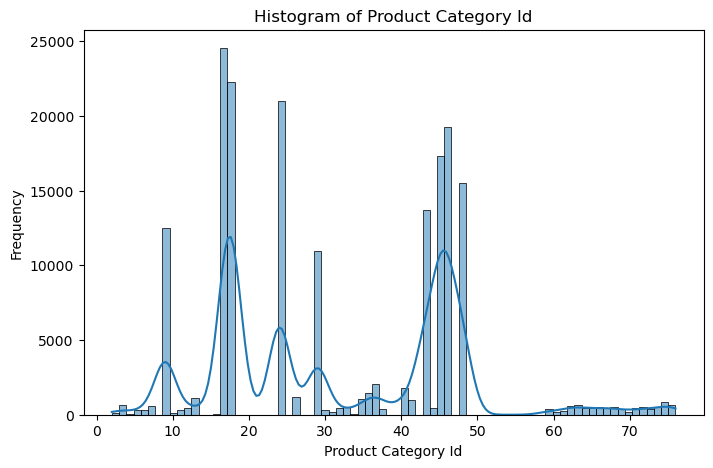

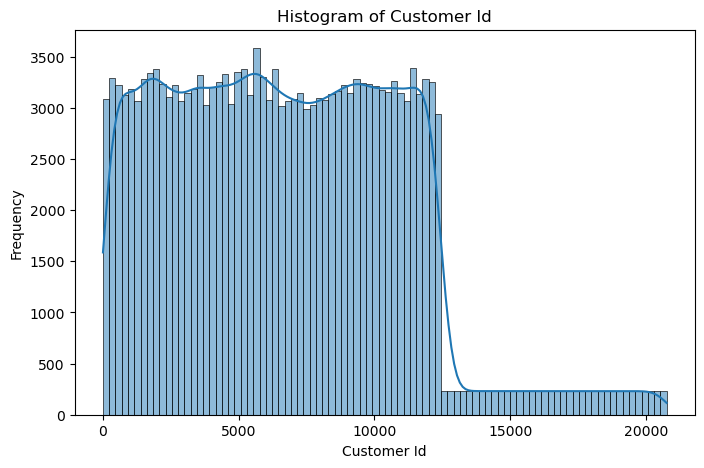

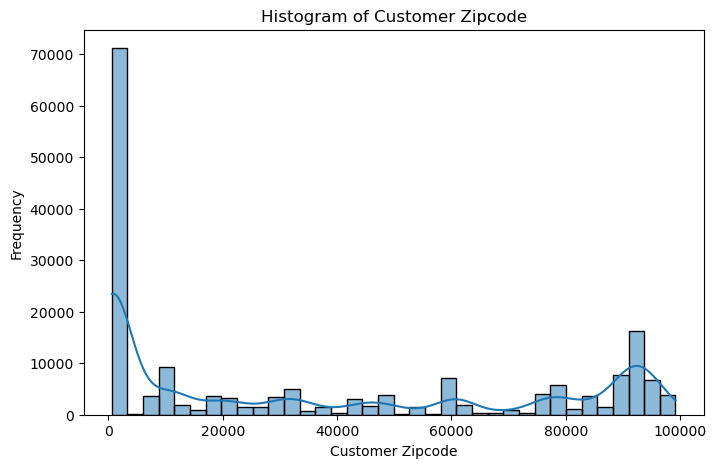

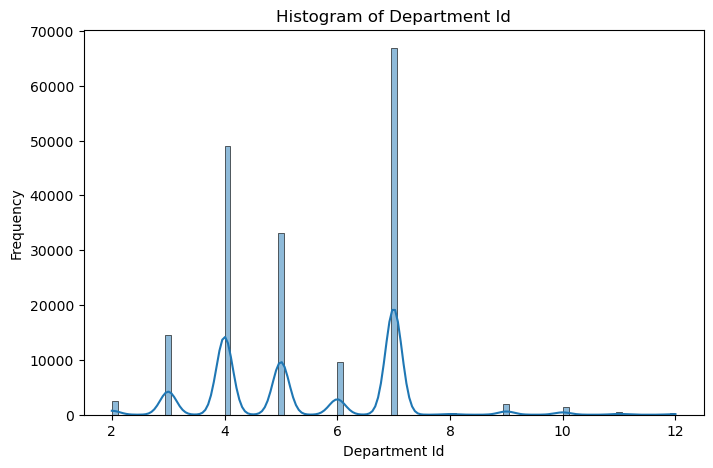

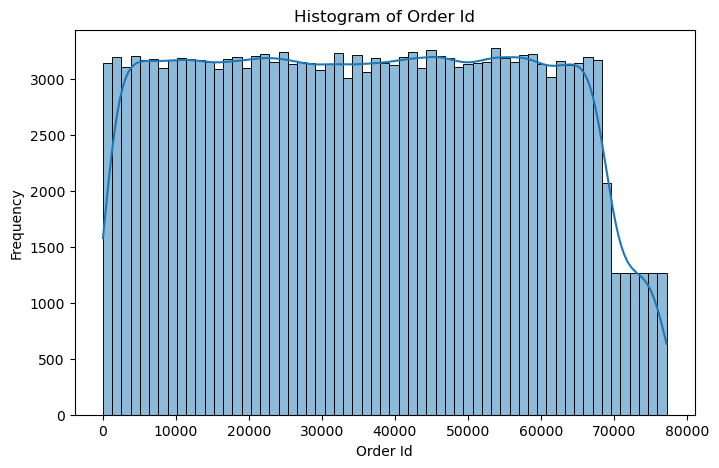

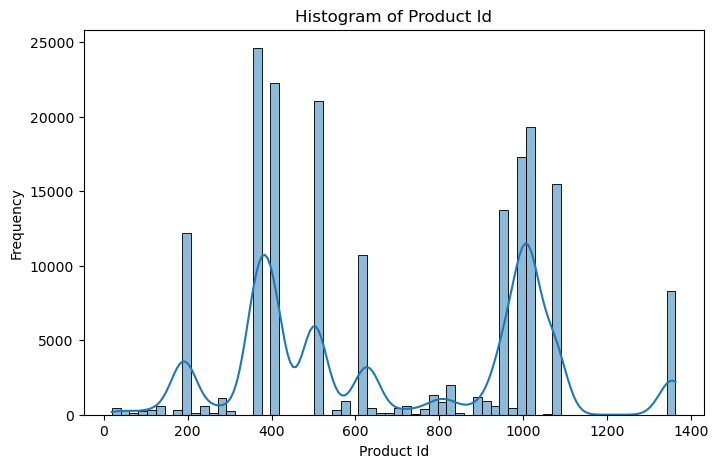

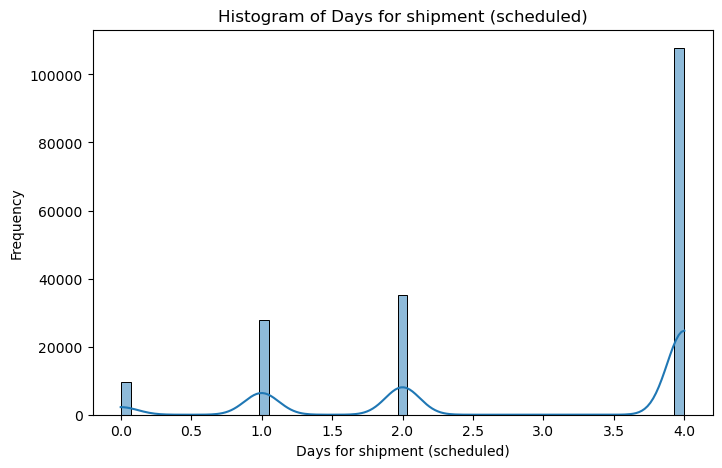

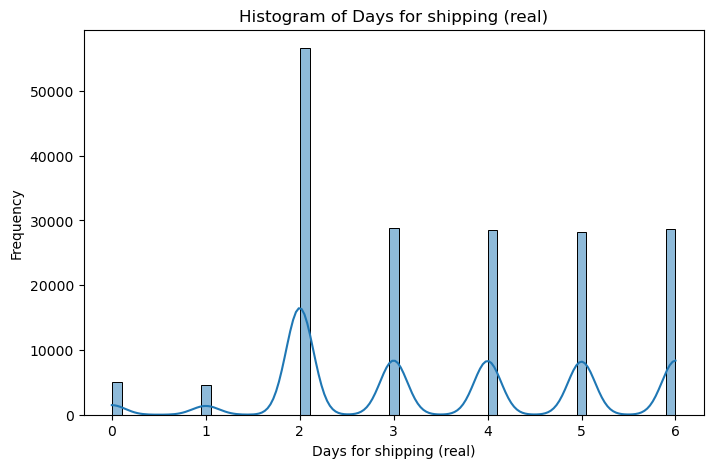

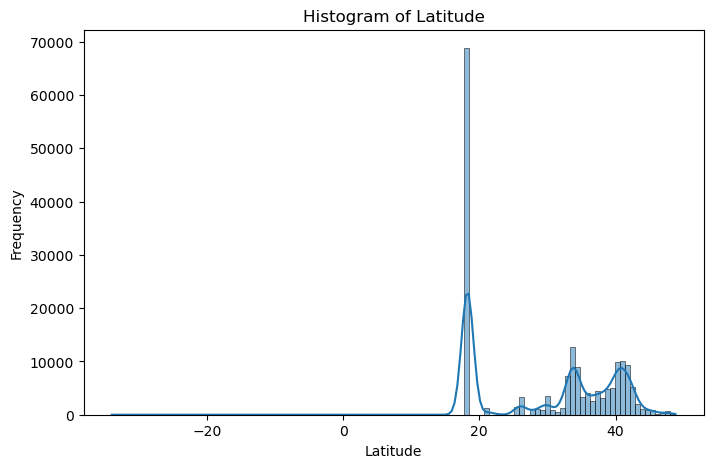

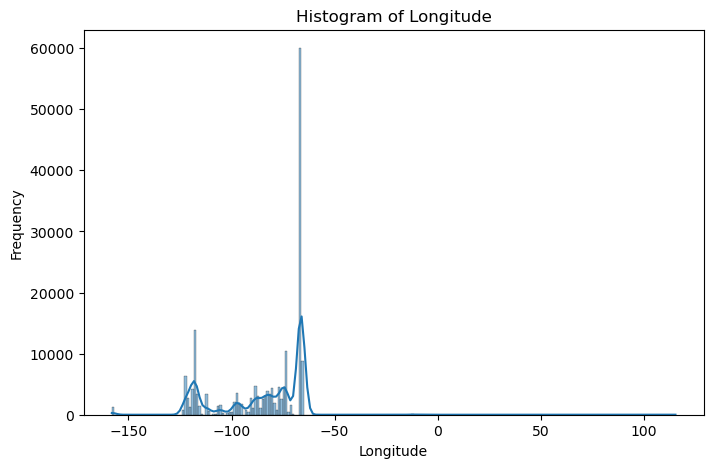

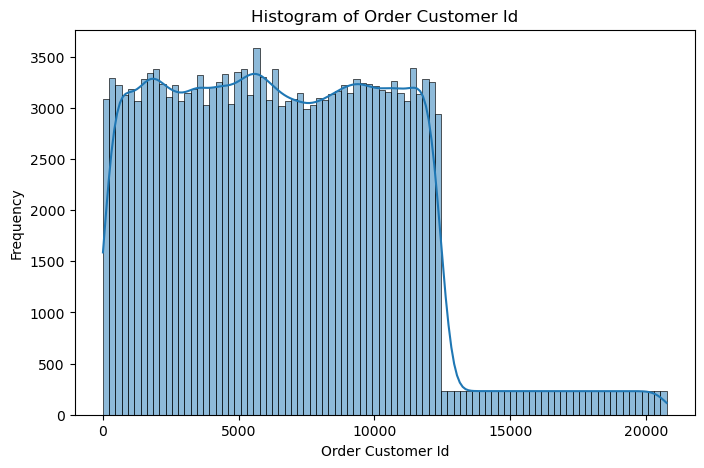

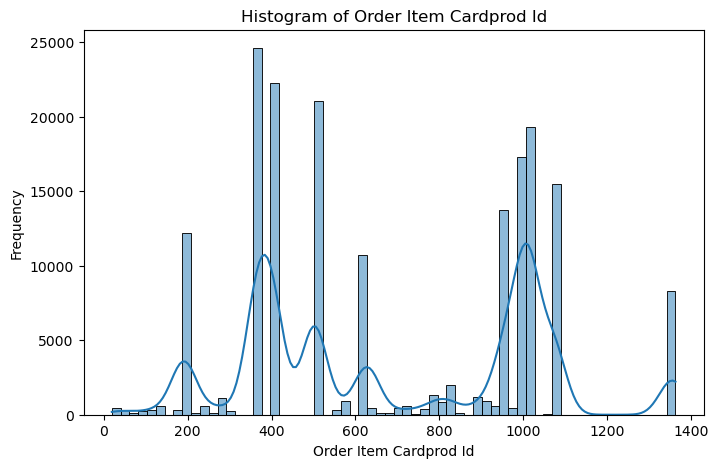

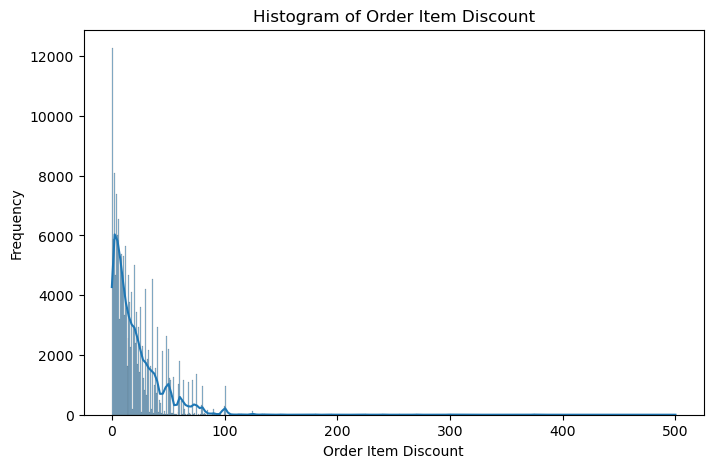

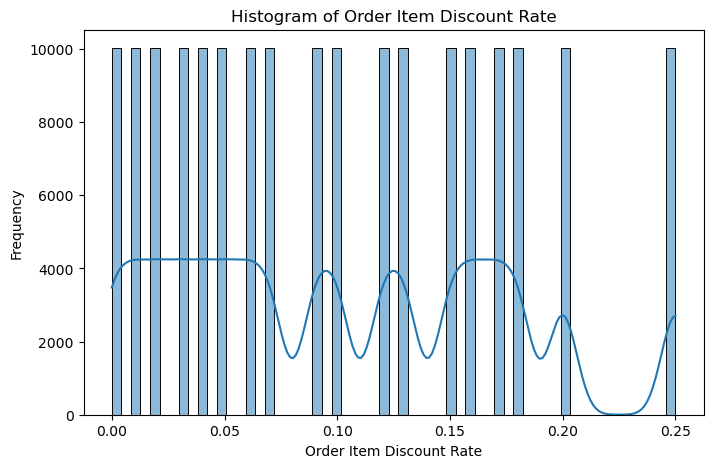

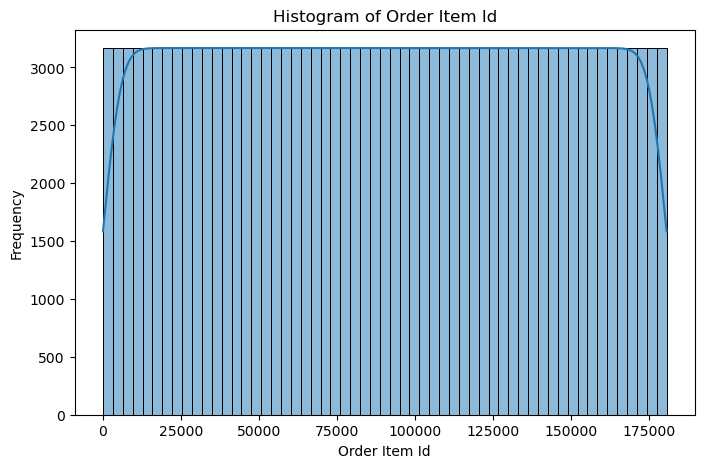

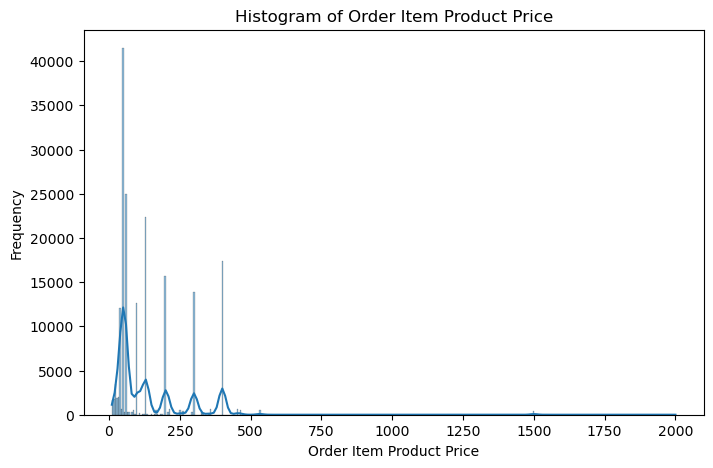

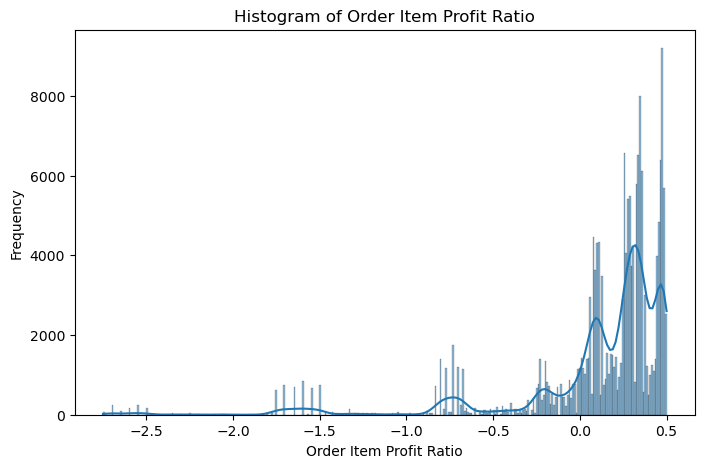

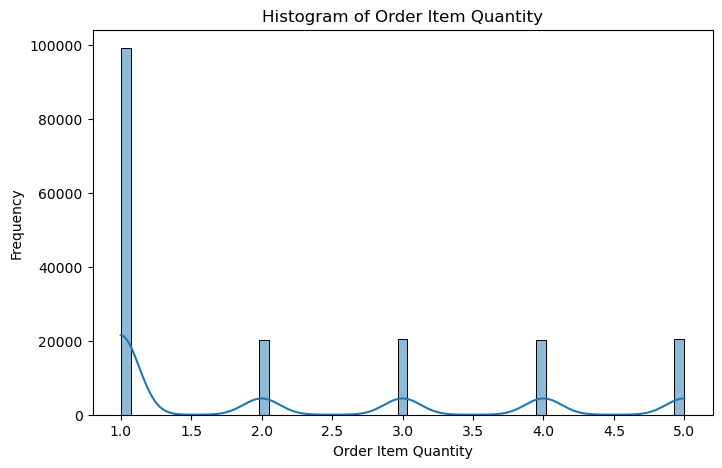

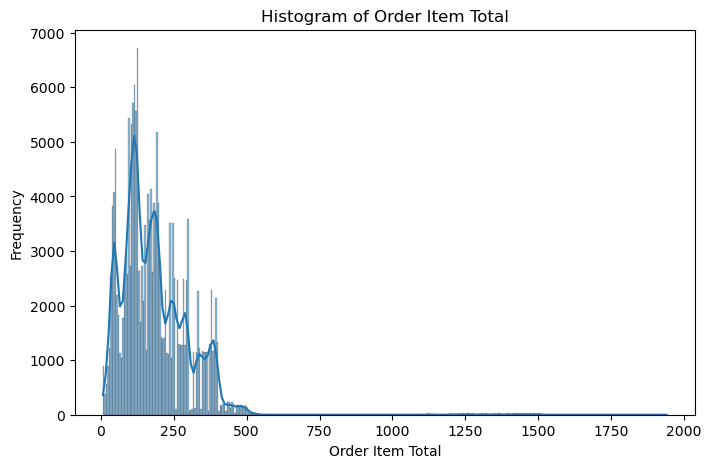

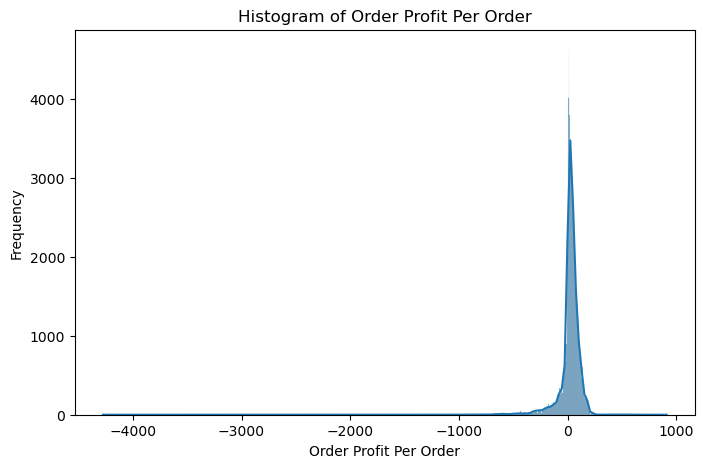

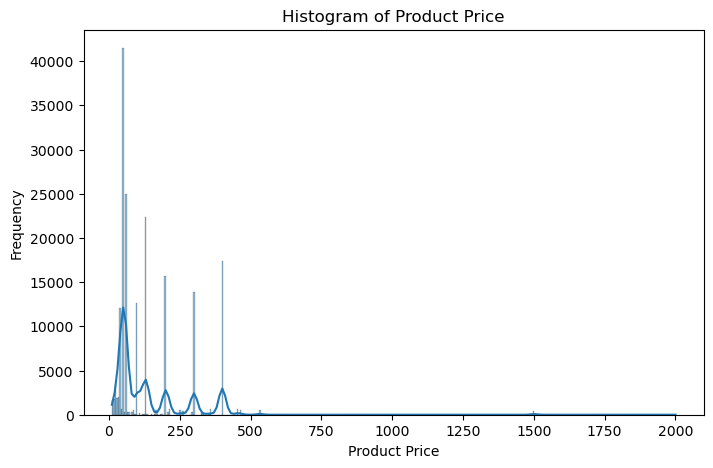

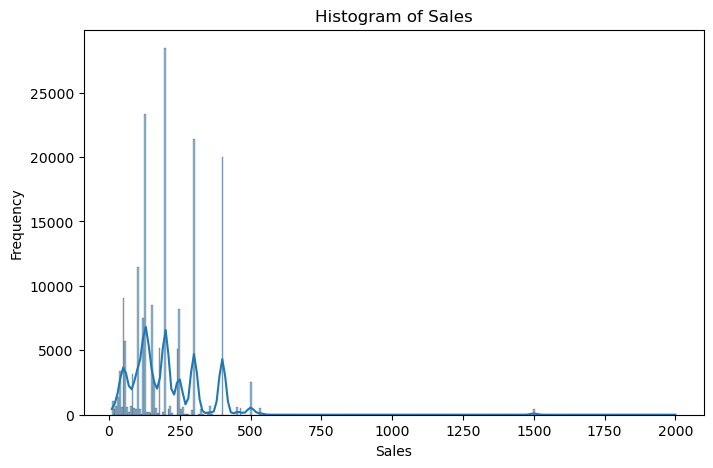

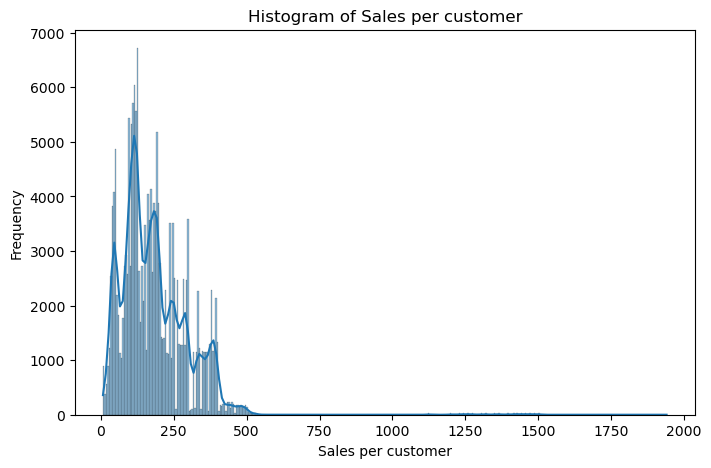

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(sale[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### a5. Find out data related issues based on the data Audit

In [324]:
# in sales dataframe Latitude and Longitude are of no use so remove these columns
sale.drop(columns=['Latitude','Longitude'], inplace=True)

### b Data Preparation:

#### b1 Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) (Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)

In [325]:
sale['Late Delivery Risk'] = 'Not Late'
# If 'Days for shipping (real)' is greater than 'Days for shipment (scheduled)', set 'Late Delivery Risk' to 'Late'
sale.loc[sale['Days for shipping (real)'] > sale['Days for shipment (scheduled)'], 'Late Delivery Risk'] = 'Late'


In [326]:
sale['Late Delivery Risk'].value_counts()

Late        103400
Not Late     77119
Name: Late Delivery Risk, dtype: int64

#### b2 Rename the variables as per python naming convensions

In [327]:
##for sale dataframe
current_columns = sale.columns

# Create new column names with spaces replaced by underscores
new_columns = [column.replace(' ', '_') for column in current_columns]

# Rename the columns
sale.columns = new_columns

sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product_Category_Id            180519 non-null  int64  
 1   Category_Name                  180519 non-null  object 
 2   Class                          180519 non-null  object 
 3   Customer_City                  180519 non-null  object 
 4   Customer_Country               180519 non-null  object 
 5   Customer_Fname                 180519 non-null  object 
 6   Customer_Id                    180519 non-null  int64  
 7   Customer_Lname                 180511 non-null  object 
 8   Customer_Segment               180519 non-null  object 
 9   Customer_State                 180519 non-null  object 
 10  Customer_Street                180519 non-null  object 
 11  Customer_Zipcode               180516 non-null  float64
 12  Delivery_Status               

In [328]:
##for sale dataframe
current_columns = invent.columns

# Create new column names with spaces replaced by underscores
new_columns = [column.replace(' ', '_') for column in current_columns]

# Rename the columns
invent.columns = new_columns

invent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order-now      118 non-null    object
 1   product_id     118 non-null    int64 
 2   product_name   118 non-null    object
 3   avg_lead_time  118 non-null    int64 
 4   avg_order_qty  118 non-null    int64 
 5   current_stock  118 non-null    int64 
 6   max_lead_time  118 non-null    int64 
 7   max_order_qty  118 non-null    int64 
 8   mod            118 non-null    int64 
 9   reorder_point  118 non-null    int64 
 10  safety_stock   118 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 10.3+ KB


#### b3  Convert the variables data types as per the data descriptions

In [329]:
sale['order_date_(DateOrders)'] = pd.to_datetime(sale['order_date_(DateOrders)'])
sale['shipping_date_(DateOrders)'] = pd.to_datetime(sale['shipping_date_(DateOrders)'])

#### b4 Impute missing values with mean for numerical variables, mode for categorical variables

In [330]:
sale.isna().sum()

#no missing value found in given dataset

Product_Category_Id              0
Category_Name                    0
Class                            0
Customer_City                    0
Customer_Country                 0
Customer_Fname                   0
Customer_Id                      0
Customer_Lname                   8
Customer_Segment                 0
Customer_State                   0
Customer_Street                  0
Customer_Zipcode                 3
Delivery_Status                  0
Department_Id                    0
Department_Name                  0
Market                           0
Order_City                       0
Order_Country                    0
order_date_(DateOrders)          0
Order_Id                         0
Order_Region                     0
Order_State                      0
Order_Status                     0
Product_Id                       0
Product_Name                     0
shipping_date_(DateOrders)       0
Shipping_Mode                    0
Type                             0
Days_for_shipment_(s

In [331]:
invent.isna().sum()
#no missing value found in given dataset

order-now        0
product_id       0
product_name     0
avg_lead_time    0
avg_order_qty    0
current_stock    0
max_lead_time    0
max_order_qty    0
mod              0
reorder_point    0
safety_stock     0
dtype: int64

#### b5. Perform any other data preparation steps as required?

In [332]:
#to reduce no. of columns we can merge customer first name and customer last name
sale['Customer_Full_Name'] = sale['Customer_Fname'] + ' ' + sale['Customer_Lname']

In [333]:
sale.drop(columns=['Customer_Fname','Customer_Lname'], inplace=True)

### c. List of Analysis

#### c1  Caclulate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products etc

In [334]:
total_sale_value = sale['Sales'].sum()
total_sale_units = sale['Order_Item_Quantity'].sum()
inventory_value = sale['Product_Price'].sum()
inventory_quantity = invent['current_stock'].sum()
profit_value = sale['Order_Profit_Per_Order'].sum()
distinct_products = sale['Product_Category_Id'].nunique()
distinct_categories = sale['Category_Name'].nunique()
distinct_products_with_category = sale[['Product_Category_Id', 'Category_Name']].drop_duplicates().shape[0]

# Print the results
print("Total Sale Value:", total_sale_value)
print("Total Sale Units:", total_sale_units)
print("Inventory Value:", inventory_value)
print("Inventory Quantity:", inventory_quantity)
print("Profit Value:", profit_value)
print("Number of Distinct Products:", distinct_products)
print("Number of Distinct Categories:", distinct_categories)
print("Number of Distinct Products with Category:", distinct_products_with_category)


Total Sale Value: 36784735.01337984
Total Sale Units: 384079
Inventory Value: 25495158.68057912
Inventory Quantity: 18965
Profit Value: 3966902.9740503575
Number of Distinct Products: 51
Number of Distinct Categories: 50
Number of Distinct Products with Category: 51


#### c2 Status of orders (number of orders by current status)

In [335]:
order_status_counts = sale['Order_Status'].value_counts()
print(order_status_counts)

Complete           59491
Pending Payment    39832
Processing         21902
Pending            20227
Closed             19616
On Hold             9804
Suspected Fraud     4062
Canceled            3692
Payment Review      1893
Name: Order_Status, dtype: int64


#### c3 Status of Delivery of orders (number of orders by each type of delivery status)

In [336]:
sale['Delivery_Status'].value_counts()

Late        98977
Advance     41592
On time     32196
Canceled     7754
Name: Delivery_Status, dtype: int64

#### c4  Late Delivery Risk by time (by each week, month, year, quarter)

In [337]:
# Group the data by month and calculate the count of 'Late' deliveries for each month.
#monthly
sale[sale['Late_Delivery_Risk'] == 'Late'].groupby(sale['order_date_(DateOrders)'].dt.to_period('M')).size()


order_date_(DateOrders)
2015-01    2977
2015-02    2739
2015-03    3068
2015-04    2893
2015-05    3111
2015-06    2889
2015-07    3052
2015-08    3066
2015-09    3025
2015-10    3028
2015-11    2953
2015-12    3076
2016-01    3081
2016-02    2757
2016-03    3010
2016-04    2918
2016-05    3074
2016-06    2977
2016-07    2928
2016-08    3039
2016-09    2933
2016-10    3073
2016-11    2966
2016-12    3085
2017-01    2920
2017-02    2823
2017-03    3089
2017-04    2943
2017-05    3022
2017-06    2772
2017-07    3100
2017-08    3108
2017-09    2973
2017-10    1264
2017-11    1187
2017-12    1235
2018-01    1246
Freq: M, dtype: int64

Text(0.5, 1.0, 'yearly wise late delivery order')

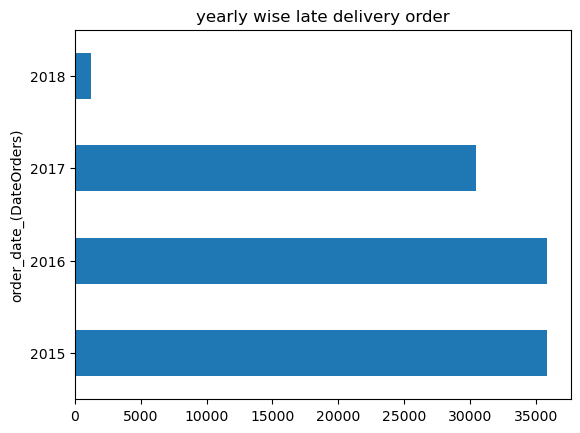

In [338]:
#yearly
p1=sale[sale['Late_Delivery_Risk'] == 'Late'].groupby(sale['order_date_(DateOrders)'].dt.to_period('Y')).size()
p1.plot(kind='barh')
plt.title('yearly wise late delivery order')

In [339]:
#weekly
sale[sale['Late_Delivery_Risk'] == 'Late'].groupby(sale['order_date_(DateOrders)'].dt.to_period('W')).size()

order_date_(DateOrders)
2014-12-29/2015-01-04    363
2015-01-05/2015-01-11    632
2015-01-12/2015-01-18    706
2015-01-19/2015-01-25    674
2015-01-26/2015-02-01    712
                        ... 
2018-01-01/2018-01-07    285
2018-01-08/2018-01-14    297
2018-01-15/2018-01-21    268
2018-01-22/2018-01-28    282
2018-01-29/2018-02-04    114
Freq: W-SUN, Length: 162, dtype: int64

In [340]:
#quarterly
sale[sale['Late_Delivery_Risk'] == 'Late'].groupby(sale['order_date_(DateOrders)'].dt.to_period('Q')).size()

order_date_(DateOrders)
2015Q1    8784
2015Q2    8893
2015Q3    9143
2015Q4    9057
2016Q1    8848
2016Q2    8969
2016Q3    8900
2016Q4    9124
2017Q1    8832
2017Q2    8737
2017Q3    9181
2017Q4    3686
2018Q1    1246
Freq: Q-DEC, dtype: int64

#### c5 Order Item qty by time (by each week, month, year, quarter)

In [341]:
#monthly
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('M'))['Order_Item_Quantity'].sum()

order_date_(DateOrders)
2015-01    11854
2015-02    10438
2015-03    12062
2015-04    11287
2015-05    11902
2015-06    11203
2015-07    11800
2015-08    11612
2015-09    11366
2015-10    11703
2015-11    11463
2015-12    11790
2016-01    11597
2016-02    10765
2016-03    11349
2016-04    11208
2016-05    11603
2016-06    11008
2016-07    11652
2016-08    11683
2016-09    11284
2016-10    11936
2016-11    11493
2016-12    11774
2017-01    11605
2017-02    11070
2017-03    11676
2017-04    11189
2017-05    11033
2017-06    10194
2017-07    11091
2017-08    11095
2017-09    10502
2017-10     2490
2017-11     2055
2017-12     2124
2018-01     2123
Freq: M, Name: Order_Item_Quantity, dtype: int64

In [342]:
#yearly
p2=sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('Y'))['Order_Item_Quantity'].sum()
p2

order_date_(DateOrders)
2015    138480
2016    137352
2017    106124
2018      2123
Freq: A-DEC, Name: Order_Item_Quantity, dtype: int64

In [343]:
#quarterly
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('Q'))['Order_Item_Quantity'].sum()

order_date_(DateOrders)
2015Q1    34354
2015Q2    34392
2015Q3    34778
2015Q4    34956
2016Q1    33711
2016Q2    33819
2016Q3    34619
2016Q4    35203
2017Q1    34351
2017Q2    32416
2017Q3    32688
2017Q4     6669
2018Q1     2123
Freq: Q-DEC, Name: Order_Item_Quantity, dtype: int64

In [344]:
#weekly
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('W'))['Order_Item_Quantity'].sum()

order_date_(DateOrders)
2014-12-29/2015-01-04    1511
2015-01-05/2015-01-11    2533
2015-01-12/2015-01-18    2780
2015-01-19/2015-01-25    2731
2015-01-26/2015-02-01    2682
                         ... 
2018-01-01/2018-01-07     479
2018-01-08/2018-01-14     480
2018-01-15/2018-01-21     479
2018-01-22/2018-01-28     480
2018-01-29/2018-02-04     205
Freq: W-SUN, Name: Order_Item_Quantity, Length: 162, dtype: int64

#### c6. Sales units/value  by time (by each week, month, year, quarter)

In [345]:
# wwekly sale value
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('W'))['Sales'].sum()

order_date_(DateOrders)
2014-12-29/2015-01-04    134711.982582
2015-01-05/2015-01-11    232199.964659
2015-01-12/2015-01-18    238068.974420
2015-01-19/2015-01-25    241548.304628
2015-01-26/2015-02-01    238540.604626
                             ...      
2018-01-01/2018-01-07    138975.412151
2018-01-08/2018-01-14     84499.990253
2018-01-15/2018-01-21     14131.709993
2018-01-22/2018-01-28     50068.321285
2018-01-29/2018-02-04     43974.681475
Freq: W-SUN, Name: Sales, Length: 162, dtype: float64

In [346]:
# monthly sale value
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('M'))['Sales'].sum()

order_date_(DateOrders)
2015-01    1.051590e+06
2015-02    9.270099e+05
2015-03    1.051254e+06
2015-04    1.014463e+06
2015-05    1.050478e+06
2015-06    1.024006e+06
2015-07    1.038081e+06
2015-08    1.029495e+06
2015-09    1.018339e+06
2015-10    1.049154e+06
2015-11    1.029120e+06
2015-12    1.057841e+06
2016-01    1.046308e+06
2016-02    9.685428e+05
2016-03    1.025853e+06
2016-04    1.001212e+06
2016-05    1.029400e+06
2016-06    1.003060e+06
2016-07    1.045716e+06
2016-08    1.048200e+06
2016-09    1.002397e+06
2016-10    1.048131e+06
2016-11    1.047590e+06
2016-12    1.037408e+06
2017-01    1.029698e+06
2017-02    9.925349e+05
2017-03    1.048005e+06
2017-04    1.038322e+06
2017-05    1.105485e+06
2017-06    1.032086e+06
2017-07    1.104373e+06
2017-08    1.109337e+06
2017-09    1.143775e+06
2017-10    1.073994e+06
2017-11    6.269144e+05
2017-12    5.039108e+05
2018-01    3.316501e+05
Freq: M, Name: Sales, dtype: float64

In [347]:
# yearly sale value
p3=sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('Y'))['Sales'].sum()
p3

order_date_(DateOrders)
2015    1.234083e+07
2016    1.230382e+07
2017    1.180844e+07
2018    3.316501e+05
Freq: A-DEC, Name: Sales, dtype: float64

In [348]:
# quarterly sale value
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('Q'))['Sales'].sum()

order_date_(DateOrders)
2015Q1    3.029854e+06
2015Q2    3.088948e+06
2015Q3    3.085914e+06
2015Q4    3.136115e+06
2016Q1    3.040704e+06
2016Q2    3.033671e+06
2016Q3    3.096313e+06
2016Q4    3.133129e+06
2017Q1    3.070238e+06
2017Q2    3.175893e+06
2017Q3    3.357486e+06
2017Q4    2.204819e+06
2018Q1    3.316501e+05
Freq: Q-DEC, Name: Sales, dtype: float64

#### c7. Profit orders/value  by time (by each week, month, year, quarter)

In [349]:
#weekly
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('W'))['Order_Item_Profit_Ratio'].sum()

order_date_(DateOrders)
2014-12-29/2015-01-04     85.14
2015-01-05/2015-01-11    130.77
2015-01-12/2015-01-18    144.24
2015-01-19/2015-01-25    121.10
2015-01-26/2015-02-01    159.56
                          ...  
2018-01-01/2018-01-07     48.85
2018-01-08/2018-01-14     46.82
2018-01-15/2018-01-21     44.78
2018-01-22/2018-01-28     75.01
2018-01-29/2018-02-04     23.35
Freq: W-SUN, Name: Order_Item_Profit_Ratio, Length: 162, dtype: float64

In [350]:
#monthly
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('M'))['Order_Item_Profit_Ratio'].sum()

order_date_(DateOrders)
2015-01    616.850000
2015-02    564.680001
2015-03    680.330000
2015-04    567.650000
2015-05    650.220000
2015-06    626.580000
2015-07    648.650000
2015-08    692.610000
2015-09    640.589999
2015-10    616.330000
2015-11    608.150000
2015-12    609.169999
2016-01    595.509998
2016-02    518.260000
2016-03    595.240000
2016-04    631.099998
2016-05    635.609998
2016-06    600.180001
2016-07    668.100000
2016-08    598.060000
2016-09    700.380000
2016-10    688.090000
2016-11    627.109999
2016-12    592.210000
2017-01    663.980000
2017-02    650.429998
2017-03    638.339999
2017-04    619.710000
2017-05    636.429998
2017-06    591.280000
2017-07    613.049999
2017-08    707.690000
2017-09    652.630001
2017-10    285.560000
2017-11    217.939999
2017-12    291.500000
2018-01    238.809999
Freq: M, Name: Order_Item_Profit_Ratio, dtype: float64

In [351]:
#yearly
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('Y'))['Order_Item_Profit_Ratio'].sum()

order_date_(DateOrders)
2015    7521.810001
2016    7449.849995
2017    6568.539997
2018     238.809999
Freq: A-DEC, Name: Order_Item_Profit_Ratio, dtype: float64

In [352]:
#quarterly
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('Q'))['Order_Item_Profit_Ratio'].sum()

order_date_(DateOrders)
2015Q1    1861.860001
2015Q2    1844.450001
2015Q3    1981.849999
2015Q4    1833.649999
2016Q1    1709.009998
2016Q2    1866.889997
2016Q3    1966.540000
2016Q4    1907.410000
2017Q1    1952.749998
2017Q2    1847.419999
2017Q3    1973.370000
2017Q4     795.000000
2018Q1     238.809999
Freq: Q-DEC, Name: Order_Item_Profit_Ratio, dtype: float64

#### c8. Order profit per order  by time (by each week, month, year, quarter)

In [353]:
# weekly order profit per order
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('W'))['Order_Profit_Per_Order'].sum()

order_date_(DateOrders)
2014-12-29/2015-01-04    16723.920007
2015-01-05/2015-01-11    22943.840083
2015-01-12/2015-01-18    24925.989880
2015-01-19/2015-01-25    23286.350031
2015-01-26/2015-02-01    27927.190174
                             ...     
2018-01-01/2018-01-07    14632.689929
2018-01-08/2018-01-14     5665.780086
2018-01-15/2018-01-21      881.339992
2018-01-22/2018-01-28     8274.870013
2018-01-29/2018-02-04     4387.209958
Freq: W-SUN, Name: Order_Profit_Per_Order, Length: 162, dtype: float64

In [354]:
# Monthly order profit per order
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('M'))['Order_Profit_Per_Order'].sum()

order_date_(DateOrders)
2015-01    111660.740132
2015-02     99140.660196
2015-03    113778.210191
2015-04    108083.679957
2015-05    112147.900143
2015-06    110147.160313
2015-07    115624.059879
2015-08    117979.770302
2015-09    113467.940118
2015-10    101757.870040
2015-11    104427.360120
2015-12    110641.549881
2016-01    106780.950229
2016-02     86809.490642
2016-03    101259.990250
2016-04    114976.619907
2016-05    110716.120111
2016-06    104196.070108
2016-07    119941.720183
2016-08    110729.540117
2016-09    123384.709977
2016-10    116781.970048
2016-11    109539.199962
2016-12    105002.689937
2017-01    114843.850277
2017-02    115111.070097
2017-03    118688.900211
2017-04    115961.060193
2017-05    115014.640014
2017-06    110399.290305
2017-07    113026.700038
2017-08    131501.160211
2017-09    122462.390153
2017-10    113447.169883
2017-11     67791.250205
2017-12     65837.629745
2018-01     33841.889977
Freq: M, Name: Order_Profit_Per_Order, dtype: float

In [355]:
# Yearly order profit per order
sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('Y'))['Order_Profit_Per_Order'].sum()

order_date_(DateOrders)
2015    1.318857e+06
2016    1.310119e+06
2017    1.304085e+06
2018    3.384189e+04
Freq: A-DEC, Name: Order_Profit_Per_Order, dtype: float64

Text(0.5, 1.0, 'Quarter wise profit')

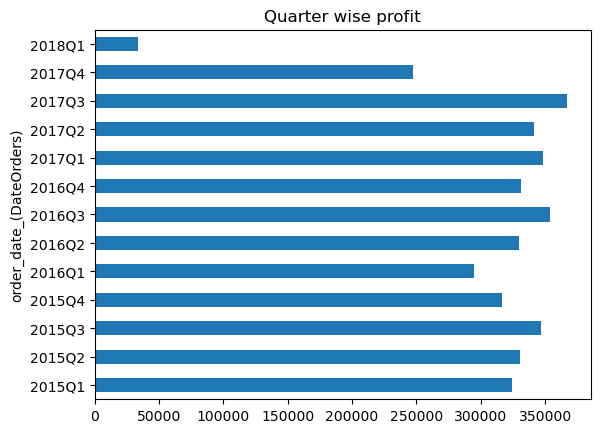

In [356]:
# Quarterly order profit per order
p13=sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('Q'))['Order_Profit_Per_Order'].sum()
p13.plot(kind='barh')
plt.title('Quarter wise profit')

#### c9. Order count by country/state/  by time (by each week, month, year, quarter)

In [357]:
#weekly 
sale.groupby([sale['Customer_Country'],sale['Customer_City'],sale['order_date_(DateOrders)'].dt.to_period('W')])['Order_Item_Quantity'].sum()

Customer_Country  Customer_City  order_date_(DateOrders)
EE. UU.           Alameda        2015-01-05/2015-01-11      14
                                 2015-01-12/2015-01-18       7
                                 2015-04-27/2015-05-03       6
                                 2015-05-18/2015-05-24       1
                                 2015-06-08/2015-06-14       5
                                                            ..
Puerto Rico       Yauco          2017-08-14/2017-08-20      10
                                 2017-09-25/2017-10-01      10
                                 2017-10-23/2017-10-29       1
                                 2017-12-04/2017-12-10       1
                                 2018-01-08/2018-01-14       1
Name: Order_Item_Quantity, Length: 27480, dtype: int64

In [358]:
#monthly
sale.groupby([sale['Customer_Country'],sale['Customer_City'],sale['order_date_(DateOrders)'].dt.to_period('M')])['Order_Item_Quantity'].sum()

Customer_Country  Customer_City  order_date_(DateOrders)
EE. UU.           Alameda        2015-01                    21
                                 2015-05                     7
                                 2015-06                     5
                                 2015-07                    23
                                 2015-08                     3
                                                            ..
Puerto Rico       Yauco          2017-08                    31
                                 2017-09                    10
                                 2017-10                     1
                                 2017-12                     1
                                 2018-01                     1
Name: Order_Item_Quantity, Length: 14943, dtype: int64

In [359]:
#yearly
sale.groupby([sale['Customer_Country'],sale['Customer_City'],sale['order_date_(DateOrders)'].dt.to_period('Y')])['Order_Item_Quantity'].sum()

Customer_Country  Customer_City  order_date_(DateOrders)
EE. UU.           Alameda        2015                        77
                                 2016                        54
                                 2017                       111
                  Albany         2015                       100
                                 2016                        51
                                                           ... 
Puerto Rico       Vega Baja      2018                         3
                  Yauco          2015                        81
                                 2016                        82
                                 2017                        77
                                 2018                         1
Name: Order_Item_Quantity, Length: 2125, dtype: int64

In [360]:
#quarterly
sale.groupby([sale['Customer_Country'],sale['Customer_City'],sale['order_date_(DateOrders)'].dt.to_period('Q')])['Order_Item_Quantity'].sum()

Customer_Country  Customer_City  order_date_(DateOrders)
EE. UU.           Alameda        2015Q1                     21
                                 2015Q2                     12
                                 2015Q3                     26
                                 2015Q4                     18
                                 2016Q1                     11
                                                            ..
Puerto Rico       Yauco          2016Q4                      8
                                 2017Q1                     34
                                 2017Q3                     41
                                 2017Q4                      2
                                 2018Q1                      1
Name: Order_Item_Quantity, Length: 6828, dtype: int64

#### c10 Inventory Units by each class or cluster

In [361]:
invent = invent.rename(columns={'product_id': 'Product_Id'})

In [362]:
final = pd.merge(sale, invent, on='Product_Id', how='inner')

In [363]:
final.groupby(final['Class'])['current_stock'].sum()

Class
High Value-Small Number           13399842
Moderate Value-Moderate Number     6059123
Small Value-Large Number          10919162
Name: current_stock, dtype: int64

#### c11. Inventory Value by each class or cluster 

In [364]:
#note there this no such Inventory Value column present in dataset so assuming Product Price(in sale dataset) is inventory value

p5=sale.groupby(final['Class'])['Product_Price'].sum()
p5

Class
High Value-Small Number           8.487171e+06
Moderate Value-Moderate Number    9.131822e+06
Small Value-Large Number          7.876165e+06
Name: Product_Price, dtype: float64

#### c12. inventory by class

In [365]:
# already did this question see c10

#### c13.  Detail Stock Action (products to be ordered, not required to ordered)

In [366]:
print('product name donot need to order')
(invent[invent['order-now']=='green']['product_name'])

product name donot need to order


0            Nike Men's Fingertrap Max Training Shoe
2            adidas Brazuca 2014 Official Match Ball
3              adidas Kids' F5 Messi FG Soccer Cleat
7      Diamondback Girls' Clarity 24 Hybrid Bike 201
9                 Under Armour Men's Tech II T-Shirt
                           ...                      
109                                       Lawn mower
111                                  Men's gala suit
113                               Adult dog supplies
115                                             Toys
117                                   Summer dresses
Name: product_name, Length: 64, dtype: object

In [367]:
print('product name need to order')
(invent[invent['order-now']=='orange']['product_name'])

product name need to order


1                        Elevation Training Mask 2.0
4         adidas Men's F10 Messi TRX FG Soccer Cleat
5      Diamondback Boys' Insight 24 Performance Hybr
6                                SOLE E25 Elliptical
8      Nike Kids' Grade School KD VI Basketball Shoe
10                        Nike Men's Comfort 2 Slide
12                Nike Women's Legend V-Neck T-Shirt
14                         Nike Women's Tempo Shorts
17                               SOLE E35 Elliptical
18     Yakima DoubleDown Ace Hitch Mount 4-Bike Rack
19                 Bowflex SelectTech 1090 Dumbbells
23     Nike Women's Free 5.0 TR FIT PRT 4 Training S
25                 Under Armour Women's Ignite Slide
26        Under Armour Men's Compression EV SL Slide
27          Under Armour Women's Ignite PIP VI Slide
31                      Polar FT4 Heart Rate Monitor
34                                    Total Gym 1400
37              Nike Men's Dri-FIT Victory Golf Polo
38     Nike Men's Deutschland Weltmeister Winn

#### c14. Product Order qty trend  (by time (by each week, month, year, quarter))

In [368]:
sale.columns

Index(['Product_Category_Id', 'Category_Name', 'Class', 'Customer_City',
       'Customer_Country', 'Customer_Id', 'Customer_Segment', 'Customer_State',
       'Customer_Street', 'Customer_Zipcode', 'Delivery_Status',
       'Department_Id', 'Department_Name', 'Market', 'Order_City',
       'Order_Country', 'order_date_(DateOrders)', 'Order_Id', 'Order_Region',
       'Order_State', 'Order_Status', 'Product_Id', 'Product_Name',
       'shipping_date_(DateOrders)', 'Shipping_Mode', 'Type',
       'Days_for_shipment_(scheduled)', 'Days_for_shipping_(real)',
       'Order_Customer_Id', 'Order_Item_Cardprod_Id', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Product_Price', 'Sales',
       'Sales_per_customer', 'Late_Delivery_Risk', 'Customer_Full_Name'],
      dtype='object')

In [369]:
#weekly
sale.groupby([sale['order_date_(DateOrders)'].dt.to_period('W'), sale['Product_Name']])['Order_Item_Quantity'].sum()

order_date_(DateOrders)  Product_Name                                 
2014-12-29/2015-01-04    Bag Boy Beverage Holder                            7
                         Bridgestone e6 Straight Distance NFL Carolina     10
                         Bridgestone e6 Straight Distance NFL San Dieg      7
                         Bridgestone e6 Straight Distance NFL Tennesse      4
                         Clicgear 8.0 Shoe Brush                           10
                                                                         ... 
2018-01-22/2018-01-28    Summer dresses                                   176
2018-01-29/2018-02-04    Fighting video games                               1
                         Smart watch                                        1
                         Summer dresses                                   202
                         Toys                                               1
Name: Order_Item_Quantity, Length: 7020, dtype: int64

In [370]:
#monthly
sale.groupby([sale['order_date_(DateOrders)'].dt.to_period('M'), sale['Product_Name']])['Order_Item_Quantity'].sum()

order_date_(DateOrders)  Product_Name                                 
2015-01                  Bag Boy Beverage Holder                           39
                         Bridgestone e6 Straight Distance NFL Carolina     56
                         Bridgestone e6 Straight Distance NFL San Dieg     32
                         Bridgestone e6 Straight Distance NFL Tennesse     16
                         Clicgear 8.0 Shoe Brush                           31
                                                                         ... 
2018-01                  Men's gala suit                                   31
                         Rock music                                       144
                         Smart watch                                      212
                         Summer dresses                                   378
                         Toys                                             276
Name: Order_Item_Quantity, Length: 1818, dtype: int64

In [371]:
#yearly
sale.groupby([sale['order_date_(DateOrders)'].dt.to_period('Y'), sale['Product_Name']])['Order_Item_Quantity'].sum()

order_date_(DateOrders)  Product_Name                                 
2015                     Bag Boy Beverage Holder                          396
                         Bridgestone e6 Straight Distance NFL Carolina    448
                         Bridgestone e6 Straight Distance NFL San Dieg    363
                         Bridgestone e6 Straight Distance NFL Tennesse    326
                         Clicgear 8.0 Shoe Brush                          410
                                                                         ... 
2018                     Men's gala suit                                   31
                         Rock music                                       144
                         Smart watch                                      212
                         Summer dresses                                   378
                         Toys                                             276
Name: Order_Item_Quantity, Length: 236, dtype: int64

In [372]:
#quarterly
sale.groupby([sale['order_date_(DateOrders)'].dt.to_period('Q'), sale['Product_Name']])['Order_Item_Quantity'].sum()

order_date_(DateOrders)  Product_Name                                 
2015Q1                   Bag Boy Beverage Holder                           93
                         Bridgestone e6 Straight Distance NFL Carolina    107
                         Bridgestone e6 Straight Distance NFL San Dieg     91
                         Bridgestone e6 Straight Distance NFL Tennesse     62
                         Clicgear 8.0 Shoe Brush                          109
                                                                         ... 
2018Q1                   Men's gala suit                                   31
                         Rock music                                       144
                         Smart watch                                      212
                         Summer dresses                                   378
                         Toys                                             276
Name: Order_Item_Quantity, Length: 669, dtype: int64

#### c15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)

In [373]:
#Top 10 Most ordered products
pd.pivot_table(sale, index='Product_Name', values=['Sales','Order_Item_Quantity'], aggfunc='sum').sort_values(by='Order_Item_Quantity',ascending=False).head(10)

,Order_Item_Quantity,Sales
Product_Name,,
Perfect Fitness Perfect Rip Deck,73698,4.421143e+06
Nike Men's Dri-FIT Victory Golf Polo,62956,3.147800e+06
O'Brien Men's Neoprene Life Vest,57803,2.888994e+06
Nike Men's Free 5.0+ Running Shoe,36680,3.667633e+06
Under Armour Girls' Toddler Spine Surge Runni,31735,1.269083e+06
Nike Men's CJ Elite 2 TD Football Cleat,22246,2.891758e+06
Field & Stream Sportsman 16 Gun Fire Safe,17325,6.929654e+06
Pelican Sunstream 100 Kayak,15500,3.099845e+06
Diamondback Women's Serene Classic Comfort Bi,13729,4.118426e+06


In [374]:
#Top 10 categories
pd.pivot_table(sale, index='Category_Name', values=['Sales','Order_Item_Quantity'], aggfunc='sum').sort_values(by='Order_Item_Quantity',ascending=False).head(10)

,Order_Item_Quantity,Sales
Category_Name,,
Cleats,73734,4.431943e+06
Women's Apparel,62956,3.147800e+06
Indoor/Outdoor Games,57803,2.888994e+06
Cardio Equipment,37587,3.694843e+06
Shop By Sport,32726,1.309522e+06
Men's Footwear,22246,2.891758e+06
Fishing,17325,6.929654e+06
Water Sports,15540,3.113845e+06
Camping & Hiking,13729,4.118426e+06


In [375]:
#Top 10 cities
p11=pd.pivot_table(sale, index='Customer_City', values=['Sales','Order_Item_Quantity'], aggfunc='sum').sort_values(by='Order_Item_Quantity',ascending=False).head(10)
p11

,Order_Item_Quantity,Sales
Customer_City,,
Caguas,142319,1.361027e+07
Chicago,8226,7.976142e+05
Los Angeles,7252,6.978874e+05
Brooklyn,7251,6.764198e+05
New York,3862,3.612171e+05
Philadelphia,3399,3.157055e+05
Bronx,3204,3.089050e+05
San Diego,3084,2.938305e+05
Houston,2787,2.673479e+05


#### c16 Top payment methods by each product category.

In [376]:
#payment_method_counts

In [377]:
# Create a pivot table to count the occurrences of each payment method for each product category
payment_method_counts = pd.crosstab(sale['Category_Name'], sale['Type'])

# Find the top payment method for each product category
top_payment_methods = payment_method_counts.idxmax(axis=1)

print("Top Payment Methods by Product Category:")
(top_payment_methods)


Top Payment Methods by Product Category:


Category_Name
Accessories                DEBIT
As Seen on  TV!            DEBIT
Baby                       DEBIT
Baseball & Softball        DEBIT
Basketball              TRANSFER
Books                      DEBIT
Boxing & MMA               DEBIT
CDs                        DEBIT
Cameras                    DEBIT
Camping & Hiking           DEBIT
Cardio Equipment           DEBIT
Children's Clothing        DEBIT
Cleats                     DEBIT
Computers                  DEBIT
Consumer Electronics       DEBIT
Crafts                     DEBIT
DVDs                       DEBIT
Electronics                DEBIT
Fishing                    DEBIT
Fitness Accessories        DEBIT
Garden                     DEBIT
Girls' Apparel             DEBIT
Golf Apparel               DEBIT
Golf Bags & Carts          DEBIT
Golf Balls                 DEBIT
Golf Gloves                DEBIT
Golf Shoes                 DEBIT
Health and Beauty          DEBIT
Hockey                     DEBIT
Hunting & Shooting         DE

#### c17. Which shipping mode is more efficient interms of not delaying?

In [378]:
total_deliveries = sale['Shipping_Mode'].value_counts()

# Calculate the count of on-time deliveries (Late_Delivery_Risk is not 'Late') for each shipping mode
on_time_deliveries = sale[sale['Late_Delivery_Risk'] != 'Late']['Shipping_Mode'].value_counts()

# Calculate the percentage of on-time deliveries for each shipping mode
percentage_on_time = (on_time_deliveries / total_deliveries) * 100

# Find the shipping mode with the highest percentage of on-time deliveries
most_efficient_shipping_mode = percentage_on_time.idxmax()

print("Percentage of On-Time Deliveries by Shipping Mode:")
print(percentage_on_time)
print("The most efficient shipping mode in terms of not delaying is:", most_efficient_shipping_mode)

Percentage of On-Time Deliveries by Shipping Mode:
First Class             NaN
Same Day          52.172127
Second Class      20.269196
Standard Class    60.231829
Name: Shipping_Mode, dtype: float64
The most efficient shipping mode in terms of not delaying is: Standard Class


#### c18. Number of orders, sales, qty  by order status

In [379]:
sale.groupby('Order_Status').agg({'Order_Item_Quantity': 'sum','Sales': 'sum','Order_Id': 'count'})

,Order_Item_Quantity,Sales,Order_Id
Order_Status,,,
Canceled,7875,7.443704e+05,3692
Closed,41458,4.022624e+06,19616
Complete,126624,1.209531e+07,59491
On Hold,20845,1.981543e+06,9804
Payment Review,4109,3.836537e+05,1893
Pending,43196,4.120533e+06,20227
Pending Payment,84736,8.106698e+06,39832
Processing,46623,4.504064e+06,21902
Suspected Fraud,8613,8.259350e+05,4062


#### c19. Which categories are most profitable categories (top5)?

In [380]:
category_profitability = sale.groupby('Category_Name')['Order_Profit_Per_Order'].sum()
top5_profitable_categories = category_profitability.nlargest(5)

(top5_profitable_categories)

Category_Name
Fishing             756220.767190
Cleats              494636.919791
Camping & Hiking    427455.568106
Cardio Equipment    383011.098485
Women's Apparel     350421.029567
Name: Order_Profit_Per_Order, dtype: float64

#### c20. Which categoires have been given highest average discount (top5)?

In [381]:
category_discounts = sale.groupby('Category_Name')['Order_Item_Discount'].mean()
top5_highest_discount_categories = category_discounts.nlargest(5)

print("Top 5 Categories with Highest Average Discount:")
(top5_highest_discount_categories)

Top 5 Categories with Highest Average Discount:


Category_Name
Computers            152.952489
Strength Training     54.790270
Garden                53.726280
Crafts                46.800517
Cameras               45.795609
Name: Order_Item_Discount, dtype: float64

#### c21 Additional questions

In [382]:
#c21 (i) Customer Segment by quantity sold,sales and profit

p8=sale.groupby('Customer_Segment')[['Order_Item_Quantity','Sales','Order_Profit_Per_Order']].sum()
p8

,Order_Item_Quantity,Sales,Order_Profit_Per_Order
Customer_Segment,,,
Consumer,199234,1.909579e+07,2.073488e+06
Corporate,116560,1.116841e+07,1.202575e+06
Home Office,68285,6.520538e+06,6.908403e+05


In [383]:
#c21 (ii) Department Id by sales,quantity and profit

sale.groupby('Department_Id')[['Sales','Order_Profit_Per_Order','Order_Item_Quantity']].sum().sort_values(by=['Sales'],ascending=False)

,Sales,Order_Profit_Per_Order,Order_Item_Quantity
Department_Id,,,
7,1.711387e+07,1.834155e+06,106165
4,7.976255e+06,8.818829e+05,98181
5,4.609028e+06,4.975236e+05,99297
3,4.006499e+06,4.102225e+05,43400
6,1.253351e+06,1.452515e+05,26059
10,1.039599e+06,1.131700e+05,1465
2,3.970509e+05,4.653806e+04,6227
9,2.288877e+05,2.419312e+04,2026
12,1.060805e+05,9.493630e+03,362


In [384]:
#c21 (iii) Department Name by profit , sales and quantity sold

sale.groupby('Department_Name')[['Order_Profit_Per_Order','Sales','Order_Item_Quantity']].sum().sort_values(by=['Sales'],ascending=False)

,Order_Profit_Per_Order,Sales,Order_Item_Quantity
Department_Name,,,
Fan Shop,1.834155e+06,1.711387e+07,106165
Apparel,8.818829e+05,7.976255e+06,98181
Golf,4.975236e+05,4.609028e+06,99297
Footwear,4.102225e+05,4.006499e+06,43400
Outdoors,1.452515e+05,1.253351e+06,26059
Technology,1.131700e+05,1.039599e+06,1465
Fitness,4.653806e+04,3.970509e+05,6227
Discs Shop,2.419312e+04,2.288877e+05,2026
Health and Beauty,9.493630e+03,1.060805e+05,362


In [385]:
#c21 (iv) Market by sales, quantity and profit

sale.groupby('Market')[['Sales','Order_Item_Quantity','Order_Profit_Per_Order']].sum().sort_values(by=['Sales'],ascending=False)

,Sales,Order_Item_Quantity,Order_Profit_Per_Order
Market,,,
Europe,1.087240e+07,105238,1.169443e+06
LATAM,1.027761e+07,112942,1.123322e+06
Pacific Asia,8.273744e+06,83680,8.577534e+05
USCA,5.066529e+06,56616,5.643138e+05
Africa,2.294453e+06,25603,2.520712e+05


In [386]:
#c21 (v) Region by quantity sold, sales and profit


sale.groupby('Order_Region')[['Order_Item_Quantity','Sales','Order_Profit_Per_Order']].sum().sort_values(by=['Sales'],ascending=False)

,Order_Item_Quantity,Sales,Order_Profit_Per_Order
Order_Region,,,
Western Europe,56504,5.894381e+06,625446.080548
Central America,62091,5.665712e+06,616341.570651
South America,32647,2.960881e+06,335154.400817
Northern Europe,20402,2.155831e+06,233450.600647
Southern Europe,19526,2.047919e+06,230829.229883
Oceania,20430,2.016654e+06,201478.020484
Southeast Asia,18835,1.932496e+06,211342.819786
Caribbean,18204,1.651019e+06,171825.640024
West of USA,17547,1.571416e+06,164940.660455


### Visualisation

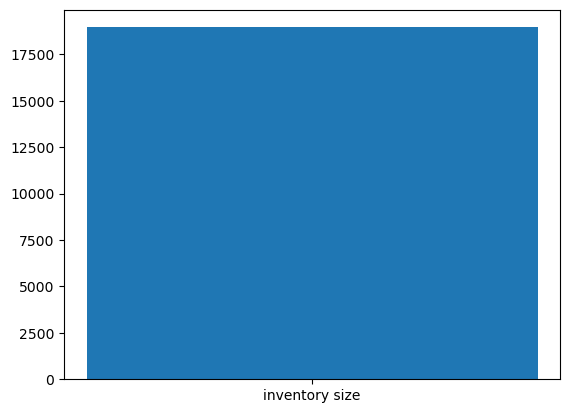

In [387]:
inventory_size = invent['current_stock'].sum()
plt.bar('inventory size', inventory_size)
plt.show()

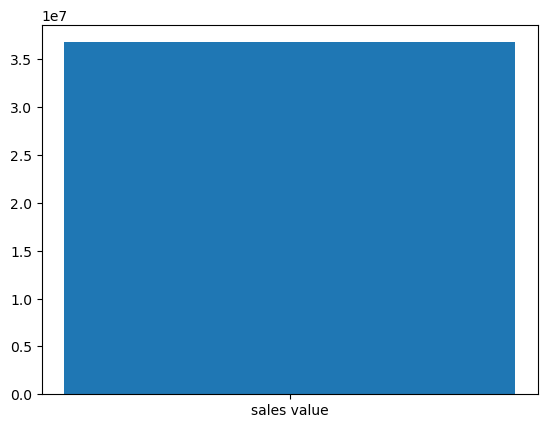

In [388]:
sale_value =sale['Sales'].sum()
plt.bar('sales value',sale_value)
plt.show()

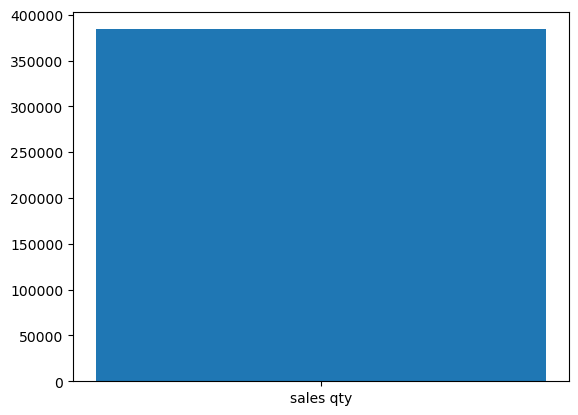

In [389]:
sale_qty =sale['Order_Item_Quantity'].sum()
plt.bar('sales qty',sale_qty)
plt.show()

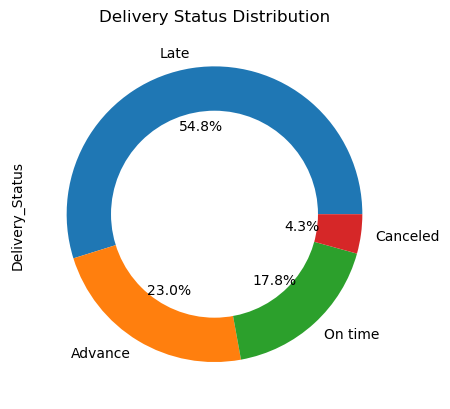

In [390]:
sale['Delivery_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Delivery Status Distribution')
plt.show()

In [391]:
sale.columns

Index(['Product_Category_Id', 'Category_Name', 'Class', 'Customer_City',
       'Customer_Country', 'Customer_Id', 'Customer_Segment', 'Customer_State',
       'Customer_Street', 'Customer_Zipcode', 'Delivery_Status',
       'Department_Id', 'Department_Name', 'Market', 'Order_City',
       'Order_Country', 'order_date_(DateOrders)', 'Order_Id', 'Order_Region',
       'Order_State', 'Order_Status', 'Product_Id', 'Product_Name',
       'shipping_date_(DateOrders)', 'Shipping_Mode', 'Type',
       'Days_for_shipment_(scheduled)', 'Days_for_shipping_(real)',
       'Order_Customer_Id', 'Order_Item_Cardprod_Id', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Product_Price', 'Sales',
       'Sales_per_customer', 'Late_Delivery_Risk', 'Customer_Full_Name'],
      dtype='object')

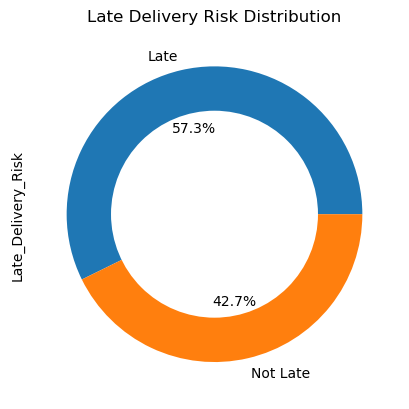

In [392]:
sale['Late_Delivery_Risk'].value_counts().plot(kind='pie', autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Late Delivery Risk Distribution')
plt.show()

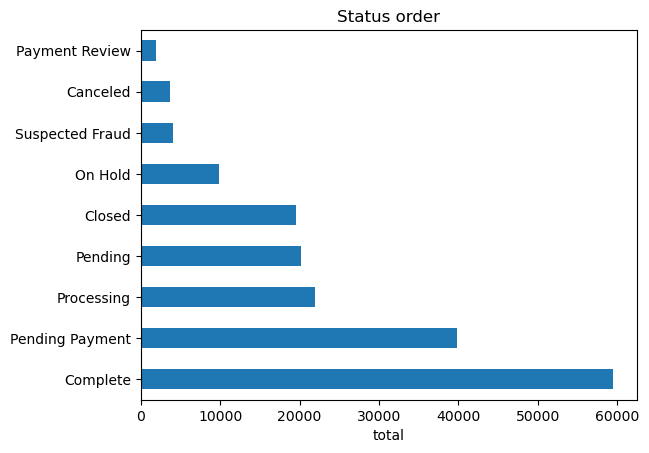

In [393]:
sale['Order_Status'].value_counts().plot(kind='barh')
plt.title('Status order')
plt.xlabel('total')
plt.show()

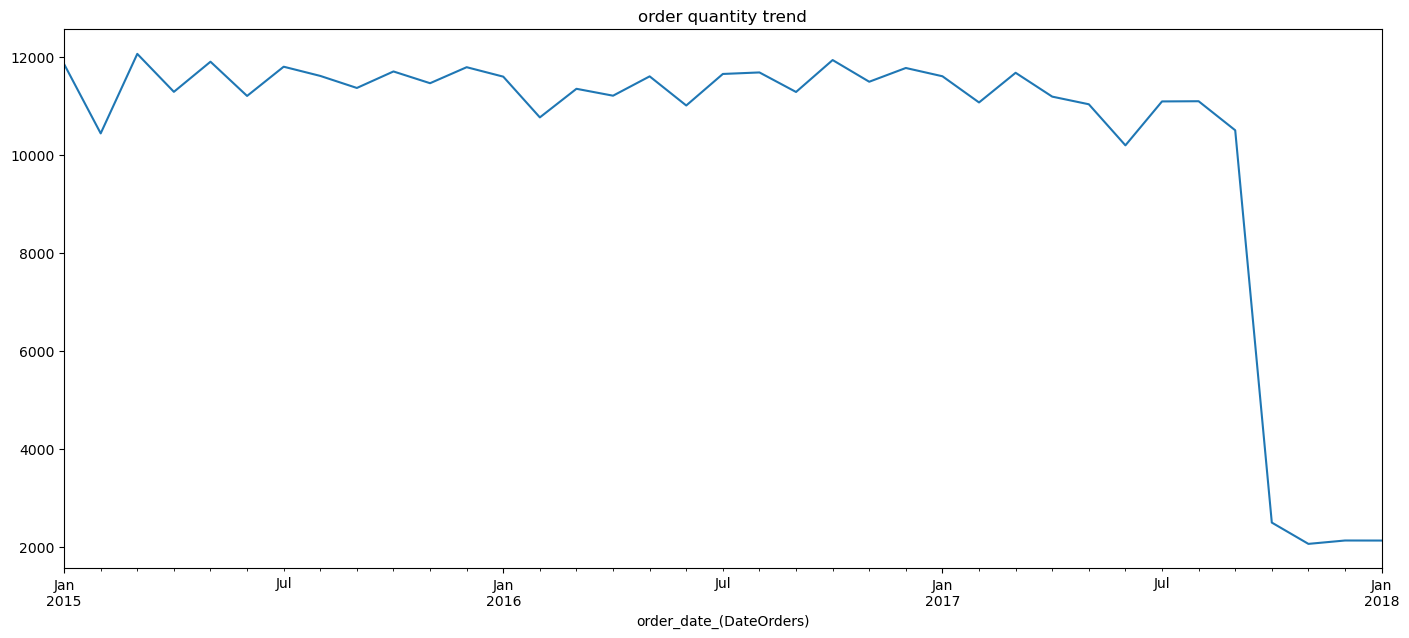

In [394]:
plt.figure(figsize=(17, 7))
monthly_quantity = sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('M'))['Order_Item_Quantity'].sum()
monthly_quantity.plot(kind='line')
plt.title('order quantity trend')
plt.show()

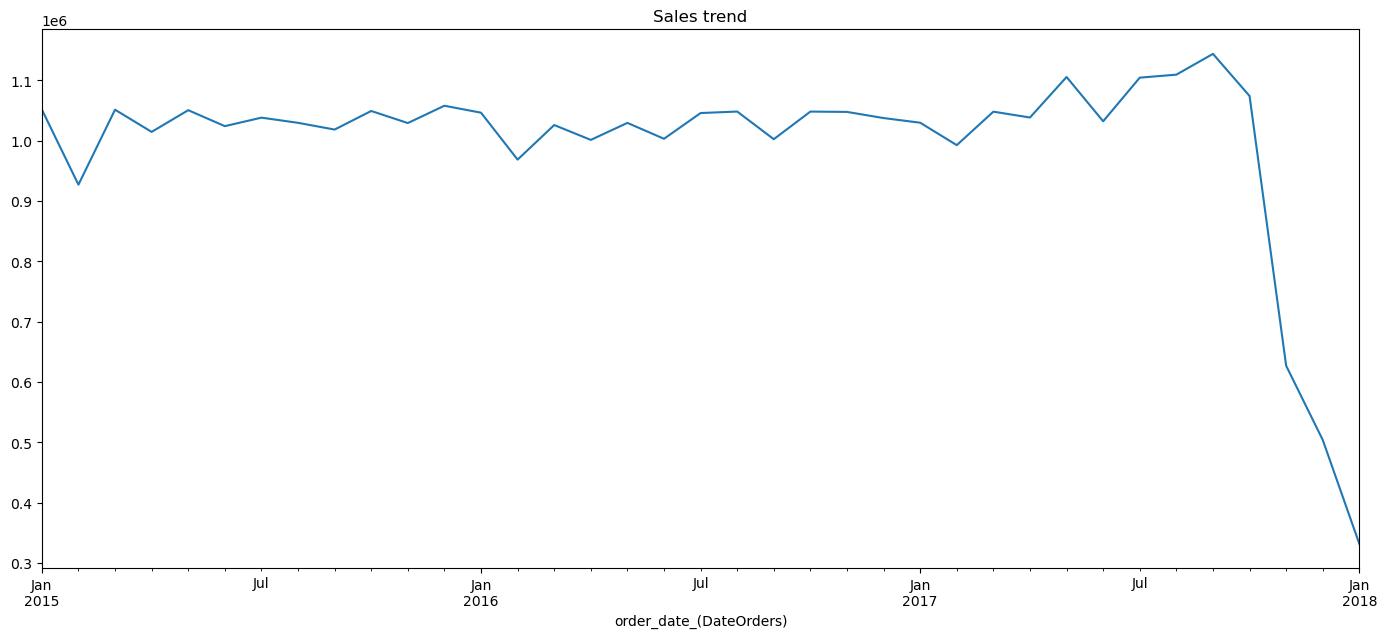

In [395]:
plt.figure(figsize=(17, 7))
monthly_quantity = sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('M'))['Sales'].sum()
monthly_quantity.plot(kind='line')
plt.title('Sales trend')
plt.show()

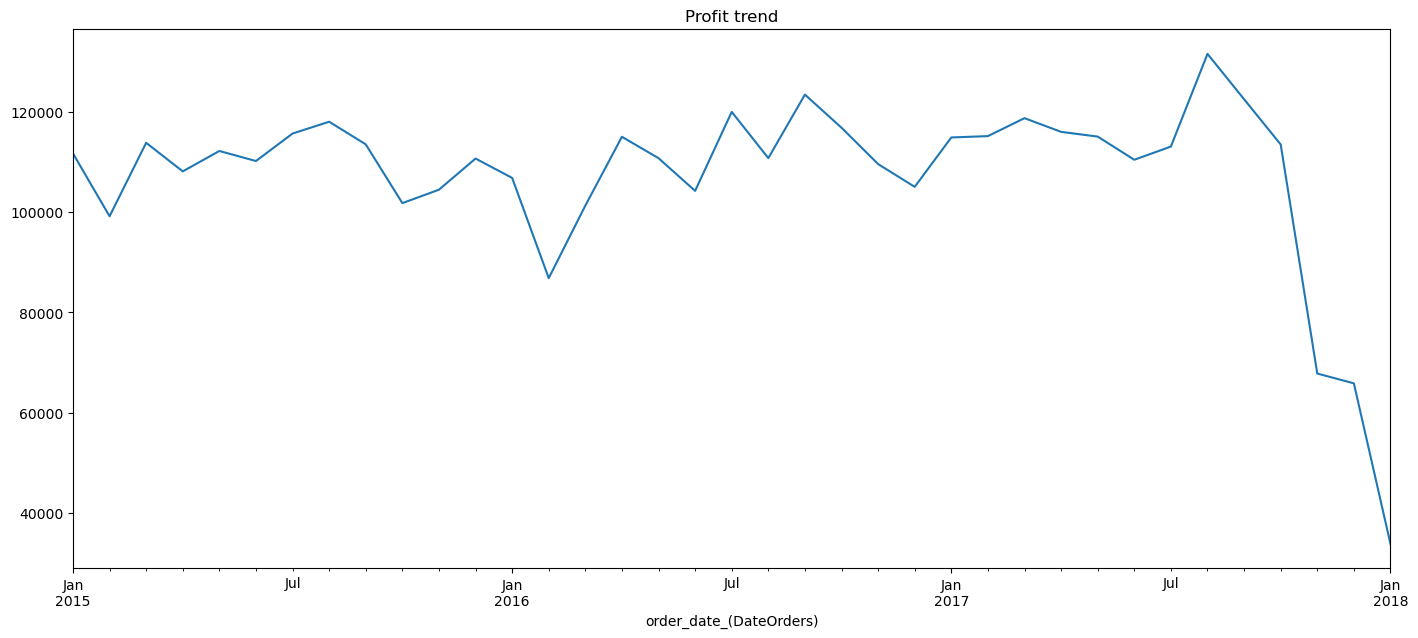

In [396]:
plt.figure(figsize=(17, 7))
monthly_quantity = sale.groupby(sale['order_date_(DateOrders)'].dt.to_period('M'))['Order_Profit_Per_Order'].sum()
monthly_quantity.plot(kind='line')
plt.title('Profit trend')
plt.show()

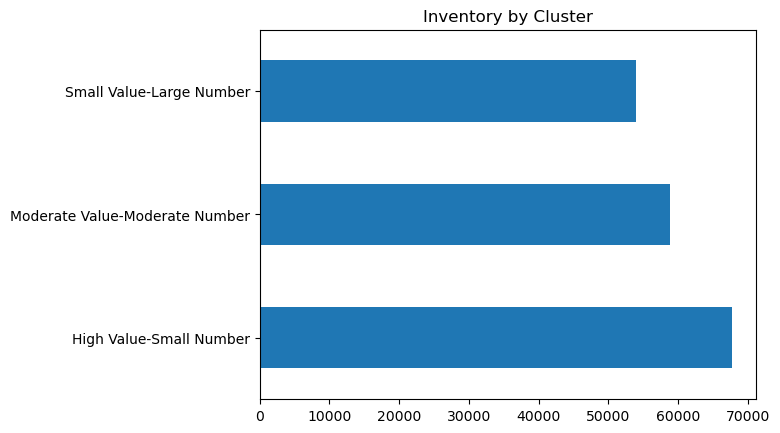

In [397]:
final['Class'].value_counts().plot(kind='barh')
plt.title('Inventory by Cluster')
plt.show()

#### Additional visualisation

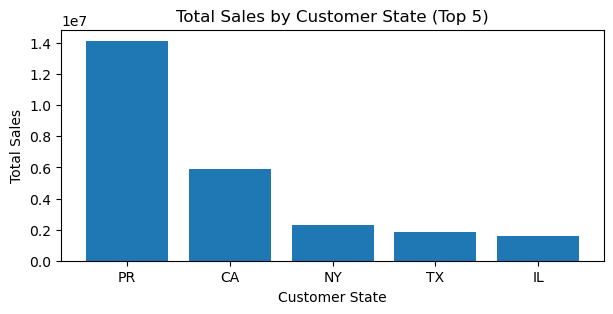

In [398]:
state_sales = sale.groupby('Customer_State')['Sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales', ascending=False).head(5)

plt.figure(figsize=(7, 3))
plt.bar(state_sales['Customer_State'], state_sales['Sales'])
plt.xlabel('Customer State')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer State (Top 5)')  
plt.show()

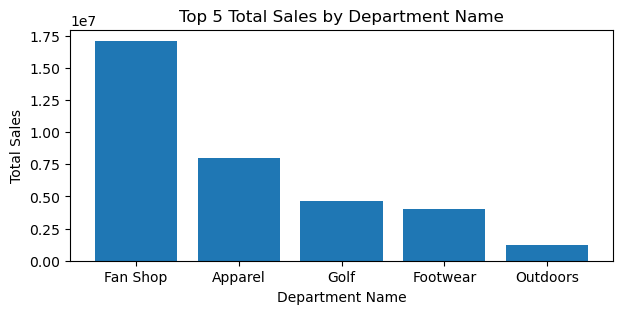

In [399]:
category_sales = sale.groupby('Department_Name')['Sales'].sum().reset_index()

category_sales = category_sales.sort_values(by='Sales', ascending=False).head(5)

plt.figure(figsize=(7, 3))
plt.bar(category_sales['Department_Name'], category_sales['Sales'])
plt.xlabel('Department Name')
plt.ylabel('Total Sales')
plt.title('Top 5 Total Sales by Department Name')
plt.savefig('g4.jpg')
plt.show()

#plt.savefig('g1.jpg')

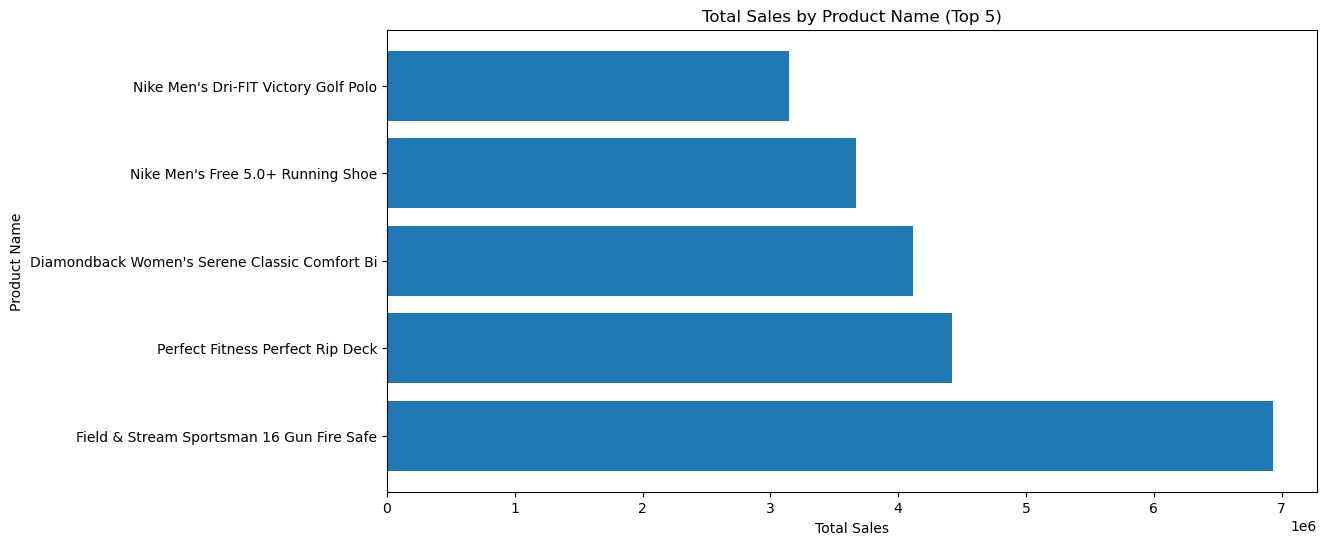

In [400]:
product_sales = sale.groupby('Product_Name')['Sales'].sum().reset_index()

product_sales = product_sales.sort_values(by='Sales', ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(product_sales['Product_Name'][:10], product_sales['Sales'])  # Display the top 10 products for better readability
plt.ylabel('Product Name')
plt.xlabel('Total Sales')
plt.title('Total Sales by Product Name (Top 5)')
plt.show()


### e. Predictive modeling

In [401]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Data Preprocessing: Aggregating data at the customer level
customer_data = sale.groupby('Customer_Id').agg({
    'Sales': 'sum',
    'Order_Item_Profit_Ratio': 'mean',
    'Order_Item_Quantity': 'sum',
    'Days_for_shipping_(real)':'mean'
}).reset_index()

#dependent(X) and independent(y) variable
X = customer_data.drop('Sales', axis=1)
y = customer_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Model Building: Linear Regression
regr = LinearRegression()
regr.fit(X_train, y_train)

# Predict sales on the test set
y_pred = regr.predict(X_test)

score=regr.score(X_train,y_train)
r2 = r2_score(y_test, y_pred)


print('R-squared:',r2)
print('score:',regr.score(X_train,y_train))
print('y predicted(sales value):',y_pred)

R-squared: 0.9123176270905847
score: 0.9123665540445447
y predicted(sales value): [4053.72361177  288.51367767  311.53147414 ...  266.76147737 1729.42074425
 1693.85518641]


In [402]:
import pickle

In [403]:
filename='model1.pkl'
pickle.dump(regr,open(filename,'wb'))

In [405]:
k1=pickle.load(open(filename,'rb'))